In [129]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.optimize import minimize
from sklearn.linear_model import LogisticRegression

In [40]:
d=loadmat("C://Users/Saba Naseem/Desktop/Machine Learning/Datasets/ex3data1.mat")

In [41]:
d.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [36]:
weights= loadmat("C://Users/Saba Naseem/Desktop/Machine Learning/Datasets/ex3weights.mat")

In [43]:
weights.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Theta1', 'Theta2'])

In [74]:
x= np.c_[np.ones((d['X'].shape[0],1)), d['X']]

In [75]:
x.shape

(5000, 401)

In [76]:
y=d['y']

In [77]:
y.shape

(5000, 1)

In [79]:
theta1, theta2= weights['Theta1'], weights['Theta2']

In [82]:
theta1.shape, theta2.shape

((25, 401), (10, 26))

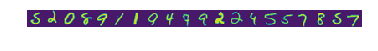

In [116]:
sample = np.random.choice(x.shape[0], 20)
plt.imshow(x[sample,1:].reshape(-1,20).T)
plt.axis('off');

In [117]:
def sigmoid(z):
    return(1 / (1 + np.exp(-z)))

In [120]:
def cost_func(theta, reg, x, y):
    m=len(y)
    h=sigmoid(x.dot(theta))
    cost= ((-(y.T.dot(np.log(h))) - (1-y).T.dot(np.log(1-h)))*(1/m)) + ((np.sum(theta[1:]**2))*(reg/(2*m)))
    return cost[0]

In [121]:
def grad_desc(theta,reg,x,y):
   
    m=len(y)
    h= sigmoid(x.dot(theta.reshape(-1,1)))
    grad= (x.T.dot(h-y)*(1/m)) +(reg/m)*np.r_[[[0]],theta[1:].reshape(-1,1)]
    
    return grad.flatten()

In [123]:
x.shape[1]

401

In [153]:
def oneVsAll(x, y,labels, reg):
    initial_theta = np.zeros((x.shape[1],1))  # 401x1
    all_theta = np.zeros((labels, x.shape[1])) #10x401

    for c in np.arange(1, labels+1):
        param = minimize(cost_func,initial_theta, args=(reg, x, (y == c)*1), method=None,jac=grad_desc, options={'maxiter':50})
        
        all_theta[c-1] = param.x
        
    return(all_theta)

In [154]:
theta = oneVsAll(x, y, 10, 0.1)

In [149]:
theta.shape

(10, 401)